# 19기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [50]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


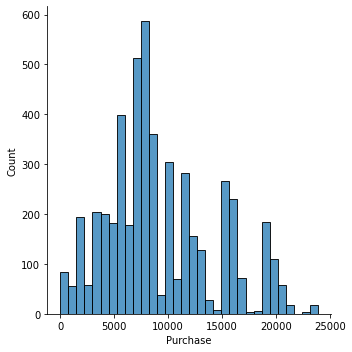

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['Purchase'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='Count'>

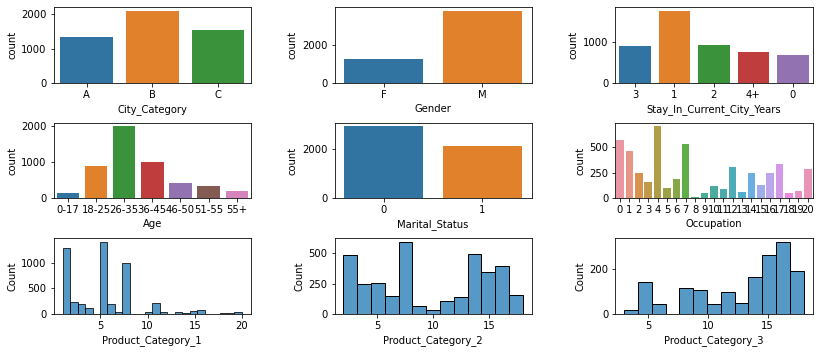

In [5]:
fig, axes = plt.subplots(3,3)
fig.tight_layout()
fig.set_size_inches(12,5)
sns.countplot(df['City_Category'], ax=axes[0,0])
sns.countplot(df['Gender'], ax=axes[0,1])
sns.countplot(df['Stay_In_Current_City_Years'], ax=axes[0,2])
sns.countplot(df['Age'], ax=axes[1,0])
sns.countplot(df['Marital_Status'], ax=axes[1,1])
sns.countplot(df['Occupation'], ax=axes[1,2])
sns.histplot(df['Product_Category_1'], ax=axes[2,0])
sns.histplot(df['Product_Category_2'], ax=axes[2,1])
sns.histplot(df['Product_Category_3'], ax=axes[2,2])

## Preprocess

In [144]:
target = df['Purchase'].copy().values
features = df.drop(['User_ID', 'Product_ID', 'Purchase', 'Product_Category_3'], axis=1)
features = features.fillna(method='ffill')

In [145]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_age = LabelEncoder()
le_city = LabelEncoder()
le_stay = LabelEncoder()

features['Gender'] = le_gender.fit_transform(features['Gender'])
features['Age'] = le_age.fit_transform(features['Age'])
features['City_Category'] = le_city.fit_transform(features['City_Category'])
features['Stay_In_Current_City_Years'] = le_stay.fit_transform(features['Stay_In_Current_City_Years'])

In [146]:
features = features.values.astype(float)
features.shape

(4998, 8)

In [147]:
from sklearn.preprocessing import StandardScaler

sc =  StandardScaler()
data = sc.fit_transform(features)

In [148]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(data, target, test_size=0.2)

print(train_X.shape)
print(valid_X.shape)
print(train_y.shape)
print(valid_y.shape)

(3998, 8)
(1000, 8)
(3998,)
(1000,)


## Train

In [149]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

mae_default = []
mae_mahalanobis = []

for i in range(1,16):
    knn_mahalanobis = KNeighborsRegressor(n_neighbors = i, algorithm='brute', metric='mahalanobis', metric_params={'V':np.cov(train_X)})
    knn_default = KNeighborsRegressor(n_neighbors = i)
    
    knn_mahalanobis.fit(train_X, train_y)
    knn_default.fit(train_X, train_y)
    
    mahala_pred = knn_mahalanobis.predict(valid_X)
    mae_mahalanobis.append(mean_absolute_error(valid_y, mahala_pred))
    default_pred = knn_default.predict(valid_X)
    mae_default.append(mean_absolute_error(valid_y, default_pred))


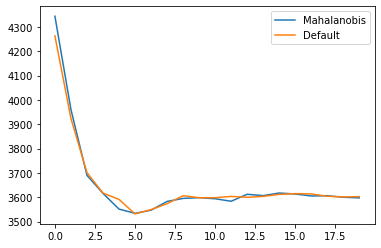

In [150]:
plt.plot(mae_mahalanobis)
plt.plot(mae_default)
plt.legend(['Mahalanobis', 'Default'])

In [151]:
print(min(mae_default))
print(min(mae_mahalanobis))

3531.6371666666664
3534.122
